# TopoFlow Flood Modeling Demo

#### Table of Contents

1.  <a href="#intro_F">Introduction</a> <br>
2.  <a href="#install_F">How to Install the TopoFlow Python Package</a> <br>
3.  <a href="#baro_F">Baro River Basin, Gambella, Ethiopia</a> <br>
4.  <a href="#flood1_F">Baro River Flooding Simulation</a> <br> 
5.  <a href="#conclusions_F">Conclusions</a> <br>
6.  <a href="#notebooks_F">Other Jupyter Notebooks for TopoFlow 3.6 </a> <br>
7.  <a href="#refs_F">Key References for TopoFlow</a> <br>
8.  <a href="#setup_F">Appendix 1: Installing TopoFlow in a conda Environment</a> <br>

<!-- Hyperlink IDs must be unique to work in Jupyter Lab when
there are multiple notebooks open. Hence the trailing letter. -->

## Introduction  <a id="intro_F"></a>

This notebook shows how to use the TopoFlow 3.6 hydrologic model to model flooding or "overbank flow".


## How to Install the TopoFlow Python Package  <a id="install_F"></a>

Before you can run the code in this notebook, you will need to install the TopoFlow 3.6 Python package.

Detailed instructions and background information for how to install TopoFlow in a conda environment are given in
<a href="#setup"><b>Appendix 1:  Installing TopoFlow in a conda Environment</b></a>.

## Baro River Basin, Gambella, Ethiopia  <a id="baro_F"></a>

The 
[<b>Baro River</b>](https://en.wikipedia.org/wiki/Baro_River)
is a large tributary of the
[<b>Sobat River</b>](https://en.wikipedia.org/wiki/Sobat_River)
that flows westward from the
[<b>Ethiopian Highlands</b>](https://en.wikipedia.org/wiki/Ethiopian_Highlands)
and lies partly within both the
[<b>Oromia</b>](https://en.wikipedia.org/wiki/Oromia_Region)
and
[<b>Gambela</b>](https://en.wikipedia.org/wiki/Gambela_Region)
regions.  It is about 150 meters wide as it passes through the
[<b>town of Gambela</b>](https://en.wikipedia.org/wiki/Gambela,_Ethiopia),
and drains a contributing area of over 41,000 square kilometers.
The town of Gambela is on the bank of the Baro River, just west of the white polygon in the next figure.
The village of Itang is also on the river bank, further west.

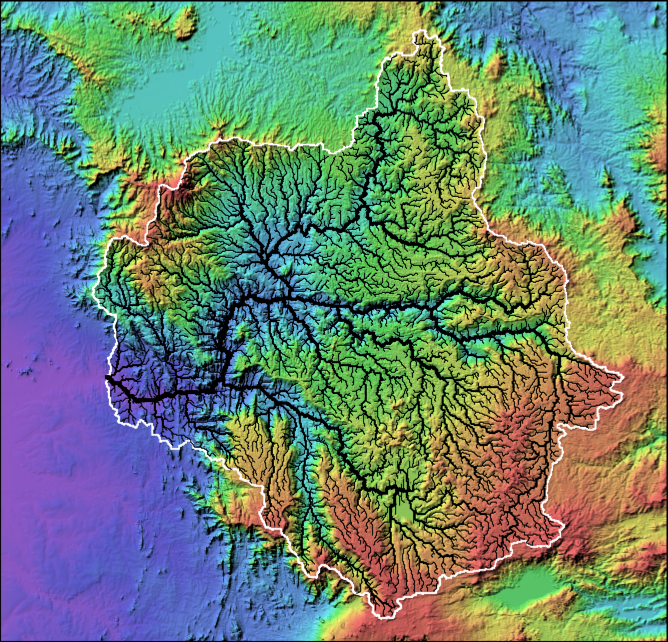

In [9]:
# Code to embed a local image in the notebook.
# png_file = '/Users/peckhams/TF_Images/Baro-Gam_12sec_relief_boundary_rivers1.png'
# from IPython.display import Image
# Image( png_file, embed=True, width=400)

<b>Figure.</b> A color, shaded-relief image of the Baro River basin, in Ethiopia, where red is high elevation and blue is lower elevation.  Black lines show the river network and the white polygon is the watershed boundary.

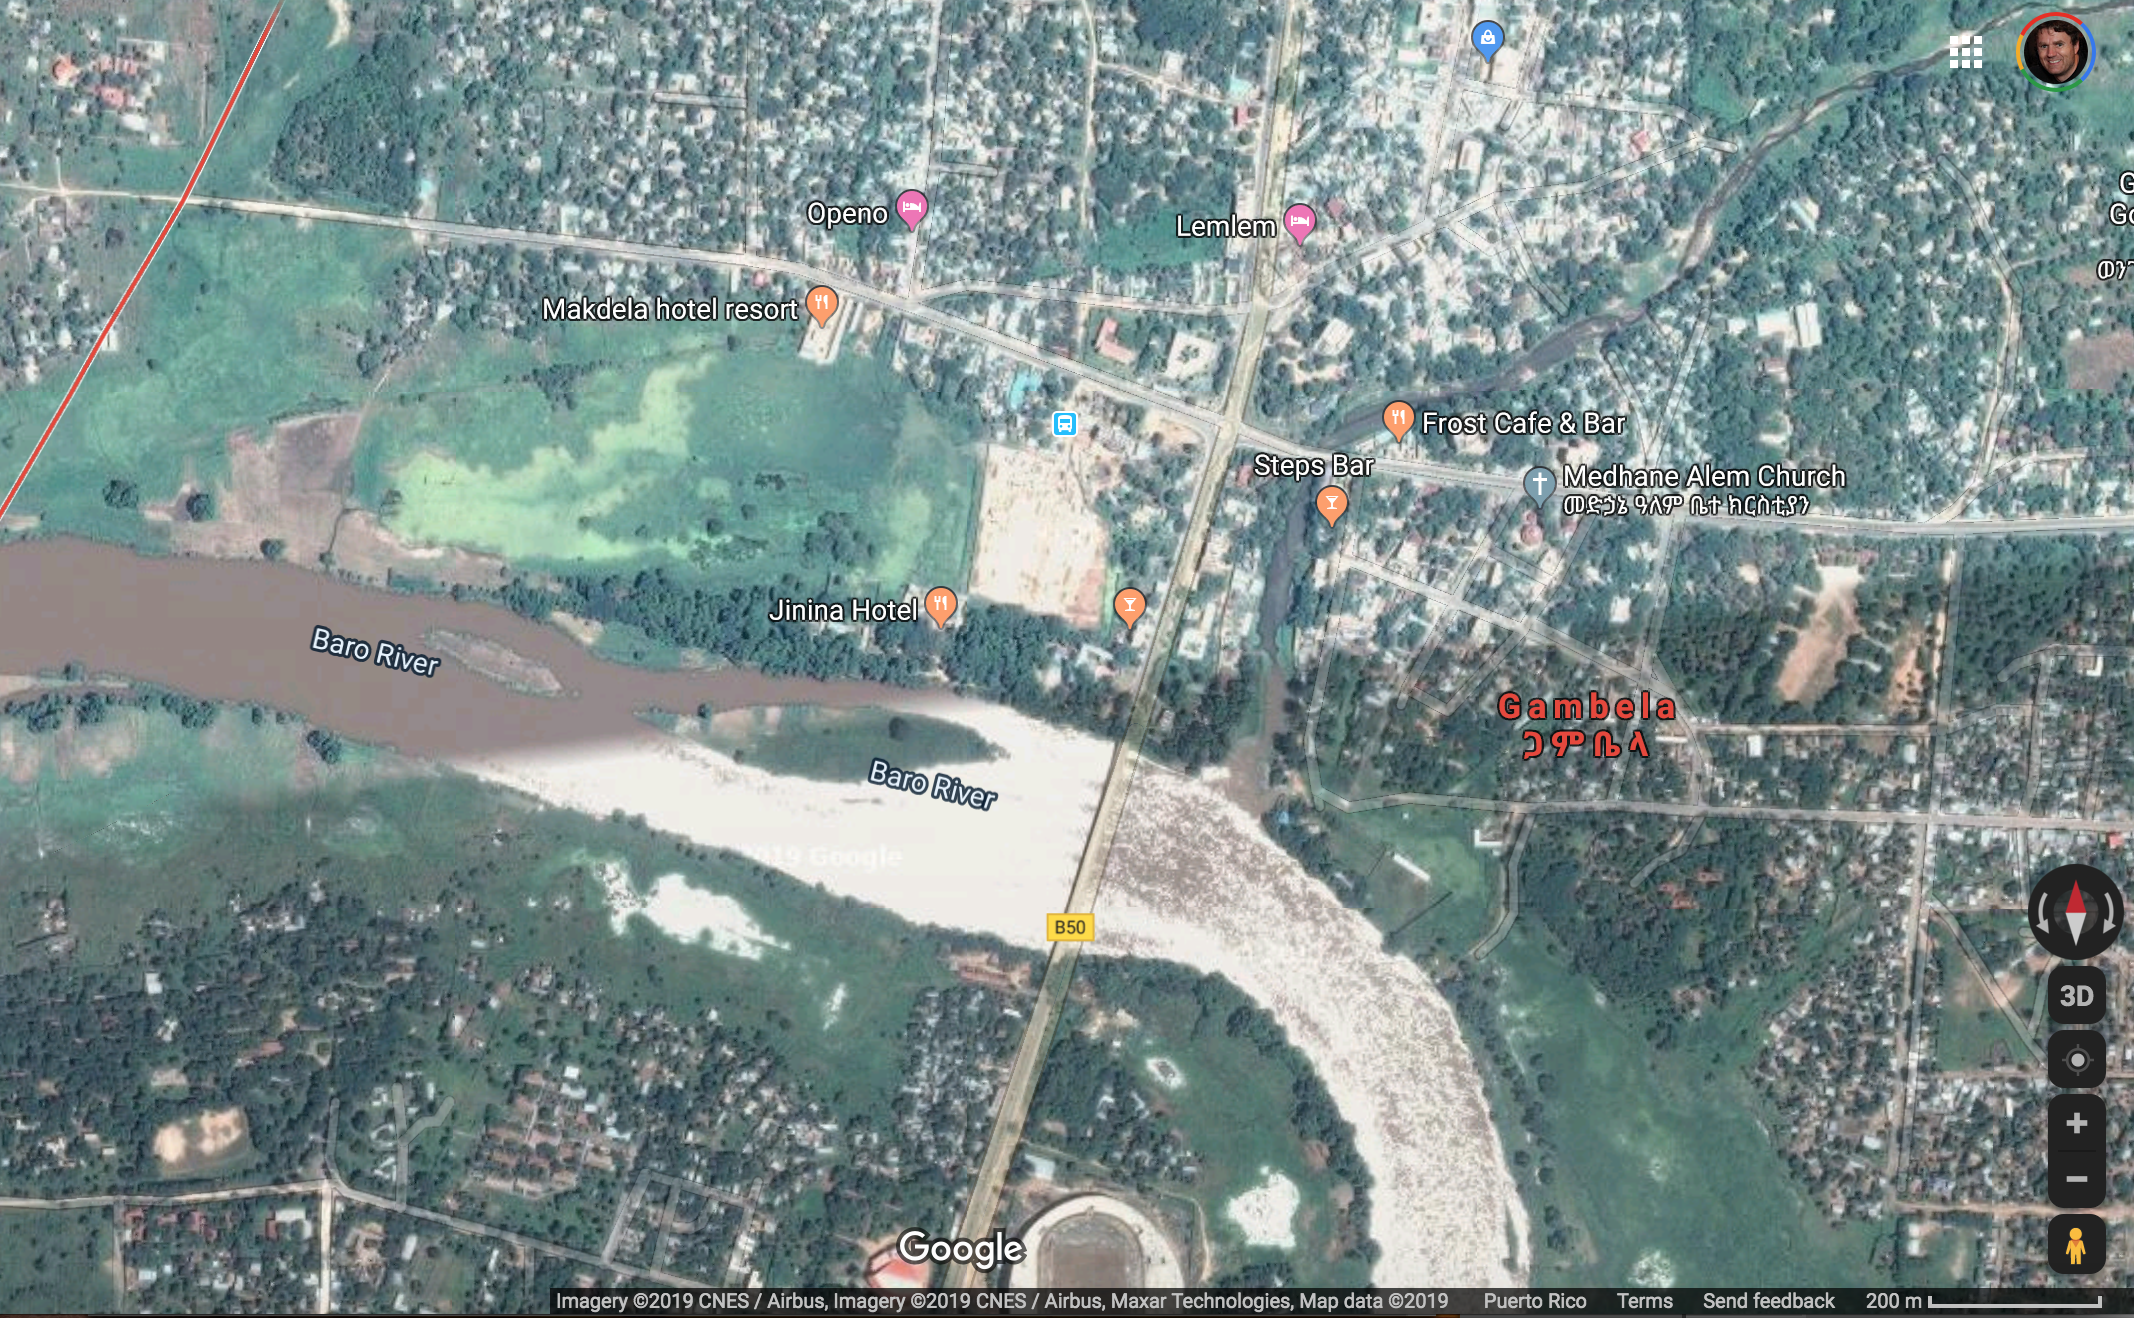

In [7]:
# Code to embed a local image in the notebook.
# png_file = '/Users/peckhams/TF_Images/Gambela_at_bridge_sat.png'
# from IPython.display import Image
# Image( png_file, embed=True, width=800)

<b>Figure.</b> A Google Earth image showing the Baro River where it passes through the town of Gambela, Ethiopia.  The Baro River is relatively wide at this location.  Using the measurement tool in Google Earth, the width is approximately 150 to 200 meters.  This image also shows areas near the river without buildings that appear to be the flood plain.  During large (but relatively rare) discharge events, the river flows beyond its banks (i.e. overbank flow) and inundates this flood plain. 

## Baro River Flooding Simulation  <a id="flood1_F"></a>

For this run, we will be using the following TopoFlow components:<br>
[<b>Channels - Kinematic Wave</b>](https://csdms.colorado.edu/wiki/Model_help:TopoFlow-Channels-Kinematic_Wave) 
    (for routing water through river channels), <br>
[<b>Infiltration - Richards 1D</b>](https://csdms.colorado.edu/wiki/Model_help:TopoFlow-Infiltration-Richards_1D)
    (for computing infiltration loss of water into the soil) ], <br>
[<b>Meteorology</b>](https://csdms.colorado.edu/wiki/Model_help:TopoFlow-Meteorology)
    (for atmospheric process variables such as precipitation rate), and <br>
<b>TopoFlow Driver</b> (for tracking mass balance, stop method and final report). <br>
All other components have their "comp_status" set to "Disabled" in their CFG file.

For the <b>Channels - Kinematic Wave</b> component, key settings (in CFG) are: <br>
(1) dt = 900 seconds (timestep) <br>
(2) the Manning-n method for flow resistance <br>
(3) initial water depths in channels given by \[site\_prefix\]_d0.rtg.<br>
(4) FLOOD_OPTION = 1 (a flag to allow and model overbank flow, or flooding) <br>
(5) save_grid_dt = 7200  (output grids are saved every 2 hours) <br>
(6) save_pixels_dt = 900  (output time series are saved every 15 minutes) <br>
(7) Q, u, and d are saved, both as grid stacks and time series. <br>
    
For the <b>Infiltration - Richards 1D</b> component, key settings (in CFG) are: <br>
(1) dt = 5 seconds (timestep) <br>
(2) n_layers = 3 (3 soil layers)<br>
(3) scalar values for each soil layer <br>
(4) save_grid_dt    = 3600 seconds (every hour) <br>
(5) save_pixels_dt  = 900  seconds (every 15 minutes) <br>
(6) save_profile_dt = 900 seconds (every 15 minutes) <br>
(7) save_cube_dt    = 3600  seconds (every 15 hour) <br>

For the <b>Meteorology</b> component, key settings (in CFG) are: <br>
(1) dt = 1800 seconds  (30 minutes, same as GPM rain interval) <br>
(2) PRECIP_ONLY = Yes  (radiation calculators, etc. turned off) <br>
(3) P = GPM_Rain_2014-08.rts <br>
(4) start_month = August, start_day = 1, start_hour = 0.0 <br>
(5) GMT_offset = 3  (Addis is 3 hours ahead of GMT) <br>
(6) save_grid_dt   = 3600 seconds (every hour) <br>
(7) save_pixels_dt = 900  seconds (every 15 minutes) <br>

For the <b>TopoFlow Driver</b> component, key settings (in CFG) are: <br>
(1) dt = 100 seconds  (only affects reporting) <br>
(2) stop_method  = Until_model_time   (run for a given number of simulated minutes) <br>
(3) T_stop_model = 44640  (number of minutes in August 2014) <br>



In [1]:
from topoflow import main
import os, os.path

cfg_prefix  = 'Test1'
case_prefix = 'Test1'
home_dir    = os.path.expanduser("~")
basin_dir   = home_dir + '/TF_Tests3/Baro-Gam_60sec/'
print('Your Home directory =', home_dir)
print('Basin directory     =', basin_dir)

time_interp_method = 'None'
# time_interp_method = 'Linear'

Importing TopoFlow 3.6 package modules:
   topoflow.utils
   topoflow.utils.tests
   topoflow.components
   topoflow.components.tests
   topoflow.framework
   topoflow.framework.tests
 
Your Home directory = /Users/peckhams
Basin directory     = /Users/peckhams/TF_Tests3/Baro-Gam_60sec/


## Model Run with GLDAS Rainfall (via bilinear interpolation)

In [2]:
cfg_dir = basin_dir + 'Flood_2014-08_GLDAS_Bilinear_cfg/'
print('CFG directory =', cfg_dir)

main.run_model(cfg_prefix=cfg_prefix, cfg_directory=cfg_dir,
               time_interp_method=time_interp_method)

CFG directory = /Users/peckhams/TF_Tests3/Baro-Gam_60sec/Flood_2014-08_GLDAS_Bilinear_cfg/
EMELI: Reading info from provider_file:
    /Users/peckhams/TF_Tests3/Baro-Gam_60sec/Flood_2014-08_GLDAS_Bilinear_cfg/Test1_providers.txt
EMELI: Reading info from comp_repo_file:
    /Users/peckhams/Dropbox/TopoFlow_3.6/topoflow/framework/component_repository.xml

EMELI: Instantiated component: tf_meteorology
EMELI: Instantiated component: tf_diversions_fraction_method
EMELI: Instantiated component: tf_channels_kin_wave
EMELI: Instantiated component: tf_snow_degree_day
EMELI: Instantiated component: tf_satzone_darcy_layers
EMELI: Instantiated component: tf_evap_priestley_taylor
EMELI: Instantiated component: tf_infil_richards_1d
EMELI: Instantiated component: tf_ice_gc2d
EMELI: Instantiated component: topoflow_driver
Driver component name = topoflow_driver
 
Meteorology component: Initializing...
Computing pixel area grid...
Reading config file into component state.
In met_base read_input_files()

### Display the Predicted Hydrograph

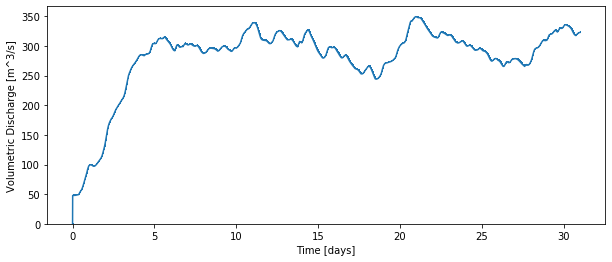

In [3]:
from topoflow.utils import visualize as tfvis
output_dir = basin_dir + 'Flood_2014-08_GLDAS_Bilinear_OUT/'
os.chdir(output_dir)
nc_file = case_prefix + '_0D-Q.nc'
tfvis.plot_time_series(nc_file, output_dir=output_dir, var_index=1,
                       marker=',', REPORT=False, xsize=10, ysize=4)

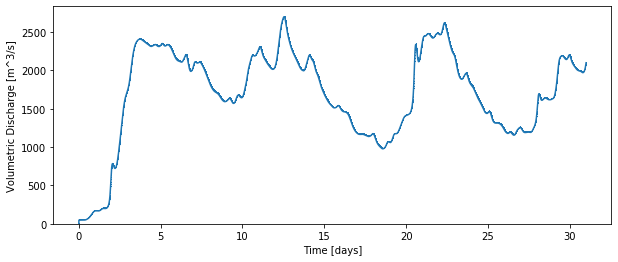

In [3]:
from topoflow.utils import visualize as tfvis
output_dir = basin_dir + 'Flood_Off_2014-08_GLDAS_Bilinear_OUT/'
os.chdir(output_dir)
nc_file = case_prefix + '_0D-Q.nc'
tfvis.plot_time_series(nc_file, output_dir=output_dir, marker=',',
                       REPORT=False, xsize=10, ysize=4)

### Display the Predicted Flooding Depth at Outlet

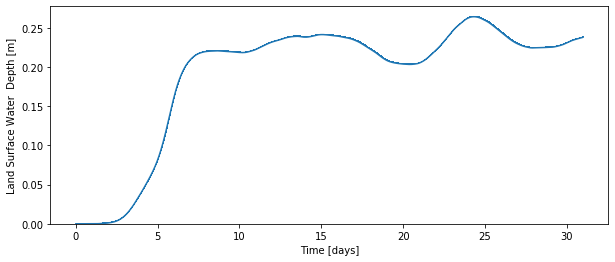

In [5]:
nc_file = case_prefix + '_0D-d-flood.nc'
tfvis.plot_time_series(nc_file, output_dir=output_dir, marker=',',
                       REPORT=False, xsize=10, ysize=4)

## Model Run with GLDAS Rainfall (via nearest-neighbor interpolation)

In [14]:
cfg_dir = basin_dir + 'Test1_2014-08_GLDAS_Nearest_cfg'
print('CFG directory =', cfg_dir)

main.run_model(cfg_prefix=cfg_prefix, cfg_directory=cfg_dir,
               time_interp_method=time_interp_method)

Your Home directory = /Users/peckhams
CFG directory       = /Users/peckhams/TF_Tests3/Baro-Gam_60sec/Test1_2014-08_GLDAS_Nearest_cfg

Reading info from provider_file:
    /Users/peckhams/TF_Tests3/Baro-Gam_60sec/Test1_2014-08_GLDAS_Nearest_cfg/Test1_providers.txt
Reading info from comp_repo_file:
    /Users/peckhams/Dropbox/TopoFlow_3.6/topoflow/framework/component_repository.xml
 
Instantiated component: tf_meteorology
Instantiated component: tf_diversions_fraction_method
Instantiated component: tf_channels_kin_wave
Instantiated component: tf_snow_degree_day
Instantiated component: tf_satzone_darcy_layers
Instantiated component: tf_evap_priestley_taylor
Instantiated component: tf_infil_richards_1d
Instantiated component: tf_ice_gc2d
Instantiated component: topoflow_driver
 
Meteorology component: Initializing...
Computing pixel area grid...
In met_base read_input_files():
   time = 0.0
   min(P) = 0.0 [mmph]
   max(P) = 0.43668001694641134 [mmph]
 
------------------------------------

### Display the Predicted Hydrograph

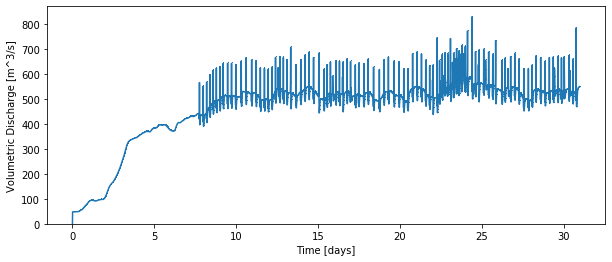

In [31]:
output_dir = basin_dir + 'Test1_2014-08_GLDAS_Nearest_OUT/'
os.chdir(output_dir)
nc_file = case_prefix + '_0D-Q.nc'
tfvis.plot_time_series(nc_file, output_dir=output_dir, marker=',',
                       REPORT=False, xsize=10, ysize=4)

### Display the Predicted Flooding Depth at Outlet

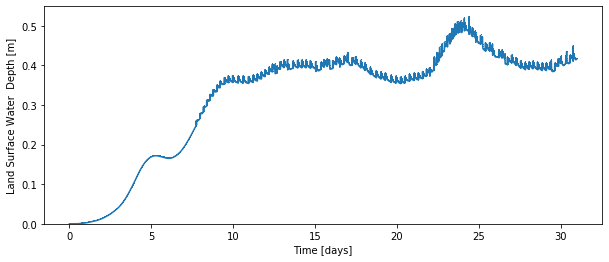

In [32]:
nc_file = case_prefix + '_0D-d-flood.nc'
tfvis.plot_time_series(nc_file, output_dir=output_dir, marker=',',
                       REPORT=False, xsize=10, ysize=4)

## Model Run with GPM Rainfall (via bilinear interpolation)

In [ ]:
cfg_dir = basin_dir + 'Test1_2014-08_GPM_Bilinear_cfg'
print('CFG directory =', cfg_dir)

main.run_model(cfg_prefix=cfg_prefix, cfg_directory=cfg_dir,
               time_interp_method=time_interp_method)

## Model Run with GPM Rainfall (via nearest-neighbor interpolation)

In [ ]:
cfg_dir = basin_dir + 'Test1_2014-08_GPM_Nearest_cfg'
print('CFG directory =', cfg_dir)

main.run_model(cfg_prefix=cfg_prefix, cfg_directory=cfg_dir,
               time_interp_method=time_interp_method)

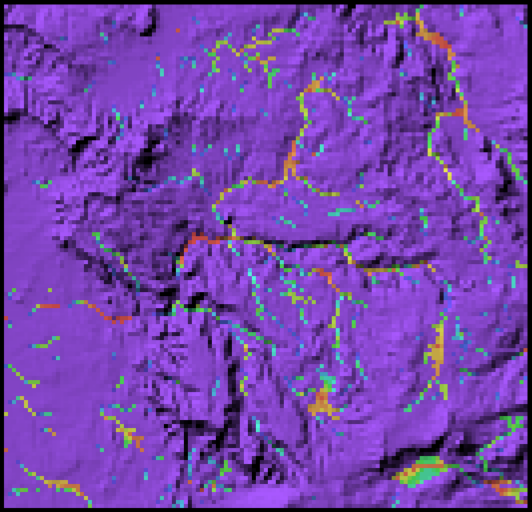

In [10]:
# Code to embed a local image in the notebook.
# png_file = '/Users/peckhams/TF_Images/Baro_Gam_1min_2014-04_flood-prone_grid_cells.png'
# from IPython.display import Image
# Image( png_file, embed=True, width=400)

<b>Figure.</b> This image spans the same bounding box as the previous shaded relief image for the Baro River.  It shows the depth of water on the land surface, outside of river channels.  Red and orange grid cells have the largest flood depth (rainbow color scheme), and purple has a depth of zero.  There is a string of orange grid cells toward the middle of the left edge and these are in the vicinity of the town of Gambela.  An effect known as <b>hillshading</b> (i.e. topographic shadows) has been added to the image that helps you to see the values in their topographic context.  Note that when you apply hillshading to a grid of elevation values, you get "shaded relief", but it can also be applied to other grids.

## Conclusions   <a id="conclusions_F"></a>

Coming soon...
<br>
<br>


## Other Jupyter Notebooks for TopoFlow 3.6  <a id="notebooks_F"></a>

There is a growing collection of Jupyter notebooks to demonstrate the functionality of the TopoFlow 3.6 hydrologic model and its numerous utilities.  These are all available at:
https://github.com/peckhams/topoflow36.

Peckham, S.D. (2019) A Jupyter notebook for getting started with TopoFlow 3.6.  https://github.com/peckhams/topoflow36/blob/master/TopoFlow_Getting_Started.ipynb.

Peckham, S.D. (2019) A Jupyter notebook to illustrate new data preparation utilities in TopoFlow 3.6.  https://github.com/peckhams/topoflow36/blob/master/TopoFlow_Utils_Demo1.ipynb.

Peckham, S.D. (2019) A Jupyter notebook to create visualizations of model output from TopoFlow 3.6. (version 2) https://github.com/peckhams/topoflow36/blob/master/TopoFlow_Visualization_v2.ipynb.

Peckham, S.D. (2020) A Jupyter notebook that discusses the use of global rainfall products such as GPM and GLDAS as inputs to TopoFlow.
https://github.com/peckhams/topoflow36/blob/master/TopoFlow_Rainfall_Inputs.ipynb.

Peckham, S.D. (2020) A Jupyter notebook with a simple model calibration exercise for TopoFlow 3.6, using gauge data.
https://github.com/peckhams/topoflow36/blob/master/TopoFlow_Calibration_Gauge_Data.ipynb.

Peckham, S.D. (2020) A Jupyter notebook to check and explore the TopoFlow solar radiation utilities, which includes shortwave and longwave radiation calculators. (Only shows a few of the capabilities so far.)
https://github.com/peckhams/topoflow36/blob/master/TopoFlow_Radiation.ipynb.

## Key References for TopoFlow  <a id="refs_F"></a>

Peckham, S.D., M. Stoica, E.E. Jafarov, A. Endalamaw and W.R. Bolton (2017) Reproducible, component-based modeling with TopoFlow, a spatial hydrologic modeling toolkit, Earth and Space Science,4(6), 377-394, special issue: Geoscience Papers of the Future, American Geophysical Union, http://dx.doi.org/10.1002/2016EA000237.

Peckham, S.D. (2009) Geomorphometry and spatial hydrologic modeling, In: Hengl, T. and Reuter, H.I. (Eds), Geomorphometry: Concepts, Software and Applications, Chapter 25, Developments in Soil Science, vol. 33, Elsevier, 579-602, http://dx.doi.org/10.1016/S0166-2481(08)00025-1.  (TopoFlow)

Jiang, P., M. Elag, P. Kumar, S.D. Peckham, L. Marini, R. Liu (2017) A service-oriented architecture for coupling web service models using the Basic Model Interface (BMI), Environmental Modelling & Software, 92, 107-118, http://dx.doi.org/10.1016/j.envsoft.2017.01.021.

Zhang, Z., D.L. Kane and L.D. Hinzman (2000) Development and application of a spatially-distributed Arctic hydrological and thermal process model (ARHYTHM),
Hydrological Processes, 14(6), 1017-1044,
<a href="https://doi.org/10.1002/(SICI)1099-1085(20000430)14:6<1017::AID-HYP982>3.0.CO;2-G">
    https://doi.org/10.1002/(SICI)1099-1085(20000430)14:6<1017::AID-HYP982>3.0.CO;2-G</a>.

Peckham, S.D. (2014a) EMELI 1.0:  An experimental smart modeling framework for automatic coupling of self-describing models, Proceedings of HIC 2014, 11th International Conf. on Hydroinformatics, New York, NY. CUNY Academic Works, http://academicworks.cuny.edu/cc_conf_hic/464/.

Peckham, S.D. (2014b) The CSDMS Standard Names:  Cross-domain naming conventions for describing process models, data sets and their associated variables, Proceedings of the 7th Intl. Congress on Env. Modelling and Software, International Environmental Modelling and Software Society (iEMSs), San Diego, CA. (Eds.  D.P. Ames, N.W.T. Quinn, A.E. Rizzoli),  Paper 12. http://scholarsarchive.byu.edu/iemssconference/2014/Stream-A/12/.

Peckham, S.D., E.W.H. Hutton and B. Norris (2013) A component-based approach to integrated modeling in the geosciences: The Design of CSDMS, Computers & Geosciences, special issue: Modeling for Environmental Change, 53, 3-12, http://dx.doi.org/10.1016/j.cageo.2012.04.002.

Peckham, S.D. (2018) Using the open-source TopoFlow Python package for extracting D8 grids from DEMs and for fluvial landscape evolution modeling, Proceedings of Geomorphometry 2018, Boulder, CO, pp. O-11-1 to O-11-4, http://2018.geomorphometry.org/Peckham_2018_geomorphometry.pdf


## Appendix 1: Installing TopoFlow in a conda Environment  <a id="setup_F"></a>

To run this Jupyter notebook, it is recommended to use Python 3.7 from an Anaconda distribution and to install the required Python packages in a conda environment called <b>tf36</b>.  This prevents conflicts with other Python packages you may have installed.
The Anaconda distribution includes many packages from the
[<b>Python Standard Library</b>](https://docs.python.org/3/library/).

First, download the TopoFlow 3.6 package from GitHub repo "topoflow36" at:
<b>https://github.com/peckhams/topoflow36</b>.
Copy or unzip the package into some directory on your computer.  Let's refer to this full path as TF36_DIR.  e.g. TF36_DIR = /Users/peckhams/Dropbox/TopoFlow_3.6

Installing TopoFlow 3.6 with pip causes most of its dependencies to be installed automatically.  However, if you want to run the growing collection of Jupyter notebooks (such as this one) that highlight TopoFlow functionality, you will also need to install the
[<b>nb_conda</b>](https://docs.anaconda.com/anaconda/user-guide/tasks/use-jupyter-notebook-extensions/) package, and optionally the <b>jupyterlab</b> package (see below).
In addition, some of the new TopoFlow utilities (e.g. regrid.py and visualize.py) require the
[<b>gdal</b>](https://pypi.org/project/GDAL/) and
[<b>matplotlib</b>](https://matplotlib.org/) packages.
Simply type the following commands at an OS prompt after installing Anaconda and downloading TopoFlow.

``` bash
% conda update -n base conda
% conda create --name tf36
% conda activate tf36
% conda list
% conda install nb_conda
% conda install gdal
% conda install matplotlib
% conda install imageio
% pip install imageio-ffmpeg  (an imageio extension)
% cd TF36_DIR
% pip install -e .   (-e is the editable/developer option)
```

<b>Note:</b>  The <b>pip</b> package manager is used to install TopoFlow 3.6, since it is not available as a conda package.  (It gets installed when you install <b>nb_conda</b>.) However, like conda, pip will install a package and its dependencies into the currently active conda environment, as explained
[<b>in these docs</b>](https://docs.conda.io/projects/conda/en/4.6.1/user-guide/tasks/manage-pkgs.html#installing-non-conda-packages).  If you switch to another environment with <b>conda activate envname</b>, you can confirm that topoflow (or cfunits, gdal, netcdf4, etc.) is not there with <b>conda list</b>. 

<b>Note:</b>  Some of the new TopoFlow utilities use a Python package version of [<b>GDAL</b>](https://pypi.org/project/GDAL/).  At the time of this writing, installing <b>gdal</b> from the <b>conda-forge </b> with <i>conda install -c conda-forge gdal</i> did not work.

<b>Note:</b> The netCDF4 package will be installed as a TopoFlow dependency.

#### <b>Conda Environments</b>

Note that <b>conda</b> is the name of the package manager for the popular Anaconda Python distribution.  One feature of conda is support for multiple environments, which are isolated from one another.  When you install Anaconda, an environment called <b>base</b> is created for you and a base set of commonly-used Python packages are installed there.  However, you can (and should!) create additional, named environments and install different sets of Python packages into them without worrying about potential conflicts with packages in other environments.  Type <b>conda env list</b> to list your available environments. You can switch to one of your other environments using the command <b>conda activate envname</b>.  (Replace "envname" with the name of an environment.) You can switch back to the base environment with the command <b>conda deactivate</b>.  It is better not to install new packages into the base environment.  See the online conda documentation on [<b>Managing Environments</b>](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html) for more information.

It is always a good idea to update conda itself before creating new environments and installing packages in them. The "-n" flag is followed by the name of the environment to update, and the "-c" flag is followed by the name of the <b>channel</b> from which to get packages.  A channel is a collection of Python packages that are provided and maintained by some group.  The word "defaults" refers to
[<b>Anaconda's own collection</b>](https://docs.anaconda.com/anaconda/packages/pkg-docs/), while
[<b>conda-forge</b>](https://conda-forge.org/feedstocks/)
refers to another popular collection and the GitHub organization that maintains it.  Many Python packages are available from both of these channels.  (However, the ipyleaflet and pydap  packages are currently not available in the Anaconda collection.) When you are installing several packages into an environment, the potential for installation problems seems to be less if you get them all from the same channel.  Keep in mind that packages you install will likely depend on many other Python packages, so there is a potential for conflicts, usually related to different package versions.  Using conda environments helps to mitigate against this and helps with <b>reproducibility</b>.

Once you've switched to an environment with <b>conda activate envname</b>, you can type <b>conda list</b> to see a list of packages.  If you do this right after you create a new environment you will see that it contains no packages.  If you do this right after installing each package above you will see that:

<ul>
    <li>Installing <b>nb_conda</b> triggers installation of <b>nb_conda_kernels</b> (2.2.3),
        <b>ipykernel</b> (5.3.0), <b>notebook</b> (6.0.3), <b>pip</b> (20.0.2),
        <b>setuptools</b> (46.4.0) and <b>traitlets</b> (4.3.3), among many others. 
    <li>Installing <b>gdal</b> triggers installation of #######.
    <li>Installing <b>matplotlib</b> triggers installation of ##########. 
</ul>

#### <b>Jupyter Notebook Extensions</b>

Note that <b>nb_conda</b> is installed first above, and triggers installation of <b>nb_conda_kernels</b> along with <b>notebook</b>.  This is important as it makes your Jupyter notebook app aware of your conda environments and available in the app as "kernels".  Anaconda provides a helpful page on the
[<b>Jupyter Notebook Extensions</b>](https://docs.continuum.io/anaconda/user-guide/tasks/use-jupyter-notebook-extensions/).
That page also explains how you can enable or disable these extensions individually. The command <b>jupyter nbextension list</b> shows you the extensions that are installed and whether they are enabled.  If you run the <b>jupyter notebook</b> or <b>jupyter lab</b> command in an environment that has <b>nb_conda_kernels</b> installed (see below), you will have the ability to associate one of your available conda environments with any new notebook you create.  Different environments give rise to different <b>kernels</b> in Jupyter, and the kernel name includes the environment name, e.g. <b>Python \[conda env:tf36\]</b>.  The kernel name is displayed in the upper right corner.  Notebooks typically open with the "environment kernel" they were created with. However, there is a <b>Change Kernel</b> option in the <b>Kernel</b> menu in the Jupyter app menu bar. (After changing the kernel, you may need to choose <b>Restart</b> from the <b>Kernel</b> menu.

#### <b>Cloning a conda Environment</b>

If your notebook is working but then you want to import additional packages (possibly with many dependencies, and potential for problems), you can keep the first environment but clone it with
<b><i>conda create --name clonename --copy --clone envname</i></b>,
and then install the additional packages in the clone.  This way, you can switch to the new environment's kernel and try to run your notebook, but if you run into any problems you can easily revert back to the original environment and functionality.

<b>Note:</b> Setting the "--copy" flag installs all packages using copies instead of hard or soft links.  This is necessary to avoid problems when using <b>pip</b> together with <b>conda</b> as described [<b>on this page</b>](https://stackoverflow.com/questions/43879119/installing-tensorflow-in-cloned-conda-environment-breaks-conda-environment-it-wa).

#### <b>Running Notebooks in the Jupyter Notebook App</b>

When you want to run the notebook, type <b>conda activate tf36</b> (at an OS command prompt) to activate this environment.  Then change to the directory that contains this notebook and type <b>jupyter notebook</b>.  By default, this folder is called <b>Jupyter</b> and is in your home directory.  In the app, choose this notebook by name, "TopoFlow_Getting_Started.ipynb", and make sure to choose the kernel called:  <b>Python \[conda env:tf36\]</b>.  See the References section at the end for more info.

#### <b>Running Notebooks in the JupyterLab App</b>

The
[<b>JupyterLab</b>](https://jupyterlab.readthedocs.io/en/stable/index.html)
app is a cool, new successor to the Notebook app and offers many additional features.  If you want to use this notebook in JupyterLab, you need to install one more Python package, as follows.

``` bash
% conda activate tf36
% conda install jupyterlab
```

You launch the JupyterLab app by typing <b>jupyter lab</b> instead of <b>jupyter notebook</b>.  To quit, choose <b>Logout</b> or <b>Shutdown</b> from the app's <b>File</b> menu.

#### <b>JupyterLab Extensions</b>

The Jupyter project provides documentation on
[<b>JupyterLab Extensions</b>](https://jupyterlab.readthedocs.io/en/stable/user/extensions.html)
which add capabilities to JupyterLab.  For example, after installing jupyterlab (see just above), if you want to use the <b>ipywidgets</b> and <b>ipyleaflet</b> Python packages, you need to install two extensions, as follows:
```
% conda activate tf36
% jupyter labextension install jupyter-leaflet
% jupyter labextension install @jupyter-widgets/jupyterlab-manager
```
To list the jupyter labextensions you have, and to see whether or not they are enabled, type <b>jupyter labextension list</b>.  <b>Note:</b> If you start jupyterlab from a conda environment in which a given extension is not installed, and then open or switch to a notebook which uses a different "environment kernel", one that requires that extension, the notebook may not work.

You should only install trusted extensions, due to security concerns, as explained in the documentation.  Third-party extensions pose a potential security risk.  An extension that allows you to play MP4 movie files in JupyterLab is
[<b>available on GitHub</b>](https://github.com/jupyterlab/jupyterlab-mp4)
(by Ian Rose of the JupyterLab organization)
and can be installed with the command:
```
% jupyter labextension install @jupyterlab/mp4-extension
```
<b>Note:</b> This command is from a pull-request on the extension's github repo.
Using the command: "jupyter labextension install jupyterlab-mp4" results in the
following error message:<br>
An error occured.
ValueError: "jupyterlab-mp4" is not a valid npm package

As of May 27, 2020, JupyterLab has added an experimental <b>Extension Manager</b> which can be enabled by choosing Settings > Enable Extension Manager in the app.
